
## Part 1 - Questions

### Question 1: 

What is the most common reason that NYC subways are delayed since 2020?

* Who (population): NYC Subway trains
* What (subject, discipline): Train delay counts, Transit
* Where (location): New York City
* When (snapshot, longitudinal): 2020- Current
* How much data do you need to do the analysis/work: Would need data on the types of delays reported, and the aggregate counts of delays

### Question N: 

Which subway line has the most delays since 2020?

* Who (population): Subway lines
* What (subject, discipline): Subway line delay count
* Where (location): NYC
* When (snapshot, longitudinal): 2020-current
* How much data do you need to do the analysis/work: Would need data on each subway lines and their delay numbers

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

The MTA, New York City government, NYC Open Data

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: MTA_Subway_Trains_Delayed_Beginning_2020
2. Link to Data: https://data.ny.gov/Transportation/MTA-Subway-Trains-Delayed-Beginning-2020/wx2t-qtaz
3. Source / Origin: 
	* Author or Creator: MTA (Metropolitan Transit Authority)
	* Publication Date: September 13 2023
	* Publisher: NY Open Data
	* Version or Data Accessed: Sun Oct 1
4. License: 	"The license for this dataset is unspecified" --> but from NYS Open Data Terms of Use "The State grants you a non-exclusive, revocable license to use the Content contained on this website in a manner consistent with the Terms of Use"  
5. Can You Use this Data Set for Your Intended Use Case?      From NYS Open Data terms of use: " We invite you to connect with
government by freely using the information tools we provide here. We ask only that you abide by our
Terms of Use, to protect against abuses of this website and its datasets. Then use our government
information however you wish, in private sector projects or in government collaborations, to generate useful
apps or to evaluate our performance... OPEN-NY guards against one basic misuse of New York State's datasets -- doing something illegal with
them (such as creating an app that purposely gives falsely dangerous driving directions). Keep your reuses lawful. So long as you are not doing anything malicious with NYS data, you may use it as you wish,
subject to no other requirements. 
https://data.ny.gov/download/77gx-ii52/application/pdf.  
In short, "The State grants you a non-exclusive, revocable license" as long as there is no illegal activity going on. Seeing as this is for a class and not for illegal purposes, I can use this data set

## Format




### Overview

* Format: CSV
* Size: 2 MB
* Number of Records: 29.7k



### Sample of Data




In [91]:
# TODO show a few lines of data from the actual file

# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 

with open('../data/raw/MTA_Subway_Trains_Delayed__Beginning_2020.csv','r') as f:
    count = 0
    next(f)
    for line in f:
        print(line)
        count +=1
        if count ==5:
            break

#print first 5 lines
        


2023-08,A DIVISION,1,1,Crew Availability,Crew Availability,193

2023-08,A DIVISION,1,1,External Factors,External Agency or Utility,111

2023-08,A DIVISION,1,1,Infrastructure & Equipment,Braking,15

2023-08,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,10

2023-08,A DIVISION,1,1,Infrastructure & Equipment,"Fire, Smoke, Debris",16




### Fields or Column Headers

* Field/Column 1: month - string
* Field/Column 2: subway division string
* Field/Column 3: subway line - string
* Field/Column 4: day type (week or weekend) int
* Field/Column 5: reporting category - string
* Field/Column 6: subcategory - string
* Field/Column 7: delays - int


## Part 3 - Extract / Transform

TODO describe your process for extracting, transforming, cleaning your incoming data:

* what columns you'll be using (extracting) from your dataset  

I will be using columns 3, 5, and 7
* how you're planning to convert the data into analogous python types / how you'll deal with type issues (for example, you may want a column that's numeric, but the data contains a label, such as 4 months)    

luckily, the subway lines are both numbers and letters so they can be kept as strings, delays should be all numeric so they can be converted to ints and types of delays are strings.

* any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you'll have to perform

If they are encountered they will be turned to None


In [92]:
import csv
with open('../data/raw/MTA_Subway_Trains_Delayed__Beginning_2020.csv','r') as f:
    reader = csv.reader(f)
    next(f)
    data = []
    subwayLines = []
    delayReasons = []
    delayNums = []
    data.append(subwayLines)
    data.append(delayReasons)
    data.append(delayNums)
    for row in reader:
        data[0].append(row[2])#subway line
        data[1].append(row[4])#broad category of delay reason
        data[2].append(int(row[6]))#delay num --> transformed from str to int
    #data is a 2 dimensional list
    
    print(data)
     


[['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7', '7'

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



will use numpy to make an array from the column and find max min range and number of records

In [93]:
import numpy as np
import statistics
#will calculate on delay num column
dataArray = np.array(delayNums)
numRecords = len(dataArray)
print("number of records:",numRecords)#number of records
max = np.max(dataArray)
min = np.min(dataArray)
range = max-min
print('range:',range)
print('max:',max)
print('min:',min)
mean = np.mean(dataArray)
print('mean:',mean)
mode = statistics.mode(dataArray)
print('mode',mode)
median = np.median(dataArray)
print('median:',median)






number of records: 29737
range: 13492
max: 13493
min: 1
mean: 97.24827655782359
mode 1
median: 17.0


#### Dispersion

use numpy to find std dev

In [94]:
standardDev = np.std(dataArray)
print("standard deviation: ", standardDev)


standard deviation:  497.1989029549228


#### Outliers


In [95]:
print('max:',max)


max: 13493


the max is clearly an outlier as the median is 17, the mode is 1 and the mean is ~97

###  Analysis on Categorical Data

#### Frequency

In [97]:
#use subway lines
#--> find most frequently delayed subway line !!!
frequency = {}
for row in subwayLines:
    if row in frequency:
        frequency[row] +=1
    else:
        ##if (row == 'Systemwide'):
            ##for row in frequency:#explained in markdown
                #frequency[row] +=1 
                #uncomment if instead of system wide add 1 to each subway line
        frequency[row] = 1
print(frequency)

reasonfrequency = {}
for row in delayReasons:
    if row in reasonfrequency:
        reasonfrequency[row] +=1
    else:
       
        reasonfrequency[row] = 1
print(reasonfrequency)

{'1': 1435, '2': 1632, '3': 1432, '4': 1521, '5': 1378, '6': 1444, '7': 1280, 'A': 1663, 'B': 800, 'C': 1401, 'D': 1570, 'E': 1419, 'F': 1532, 'G': 1223, 'JZ': 1255, 'L': 1132, 'M': 1141, 'N': 1671, 'Q': 1572, 'R': 1519, 'S 42nd': 245, 'S Fkln': 267, 'S Rock': 677, 'Systemwide': 528}
{'Crew Availability': 1885, 'External Factors': 2176, 'Infrastructure & Equipment': 14219, 'Operating Conditions': 1850, 'Planned ROW Work': 4537, 'Police & Medical': 5070}


There is a value called Systemwide in the subway lines column. This presumably represents systemwide delays, thus affecting every line in the system. It can be looked at as its own datapoint but also can be seen as adding 1 delay to every subway line. 

#### Unique Values

In [98]:
print (frequency.keys())
print(reasonfrequency.keys())
vals = []
for val in delayNums:
    if val not in vals:
        vals.append(val)
    else:
        pass
print(vals)

dict_keys(['1', '2', '3', '4', '5', '6', '7', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'JZ', 'L', 'M', 'N', 'Q', 'R', 'S 42nd', 'S Fkln', 'S Rock', 'Systemwide'])
dict_keys(['Crew Availability', 'External Factors', 'Infrastructure & Equipment', 'Operating Conditions', 'Planned ROW Work', 'Police & Medical'])
[193, 111, 15, 10, 16, 38, 49, 1, 55, 29, 78, 22, 260, 12, 366, 188, 272, 48, 44, 5, 7, 8, 4, 6, 9, 18, 34, 116, 96, 13, 21, 182, 20, 54, 271, 251, 28, 108, 230, 47, 35, 19, 11, 150, 31, 161, 100, 62, 26, 57, 86, 17, 101, 74, 3, 65, 27, 66, 2, 211, 25, 93, 67, 60, 175, 76, 237, 32, 36, 160, 51, 94, 87, 14, 226, 50, 33, 227, 79, 37, 166, 64, 155, 180, 231, 532, 253, 63, 602, 124, 90, 39, 99, 69, 219, 151, 89, 153, 240, 30, 372, 121, 43, 80, 317, 81, 507, 574, 186, 70, 113, 132, 134, 120, 23, 234, 131, 179, 92, 229, 483, 171, 75, 91, 359, 221, 210, 56, 138, 112, 145, 95, 295, 551, 103, 104, 42, 421, 163, 440, 130, 622, 84, 200, 77, 59, 72, 340, 83, 246, 136, 148, 71, 114, 403, 152, 24, 167

## Part 5 - Visualizations



<BarContainer object of 6 artists>

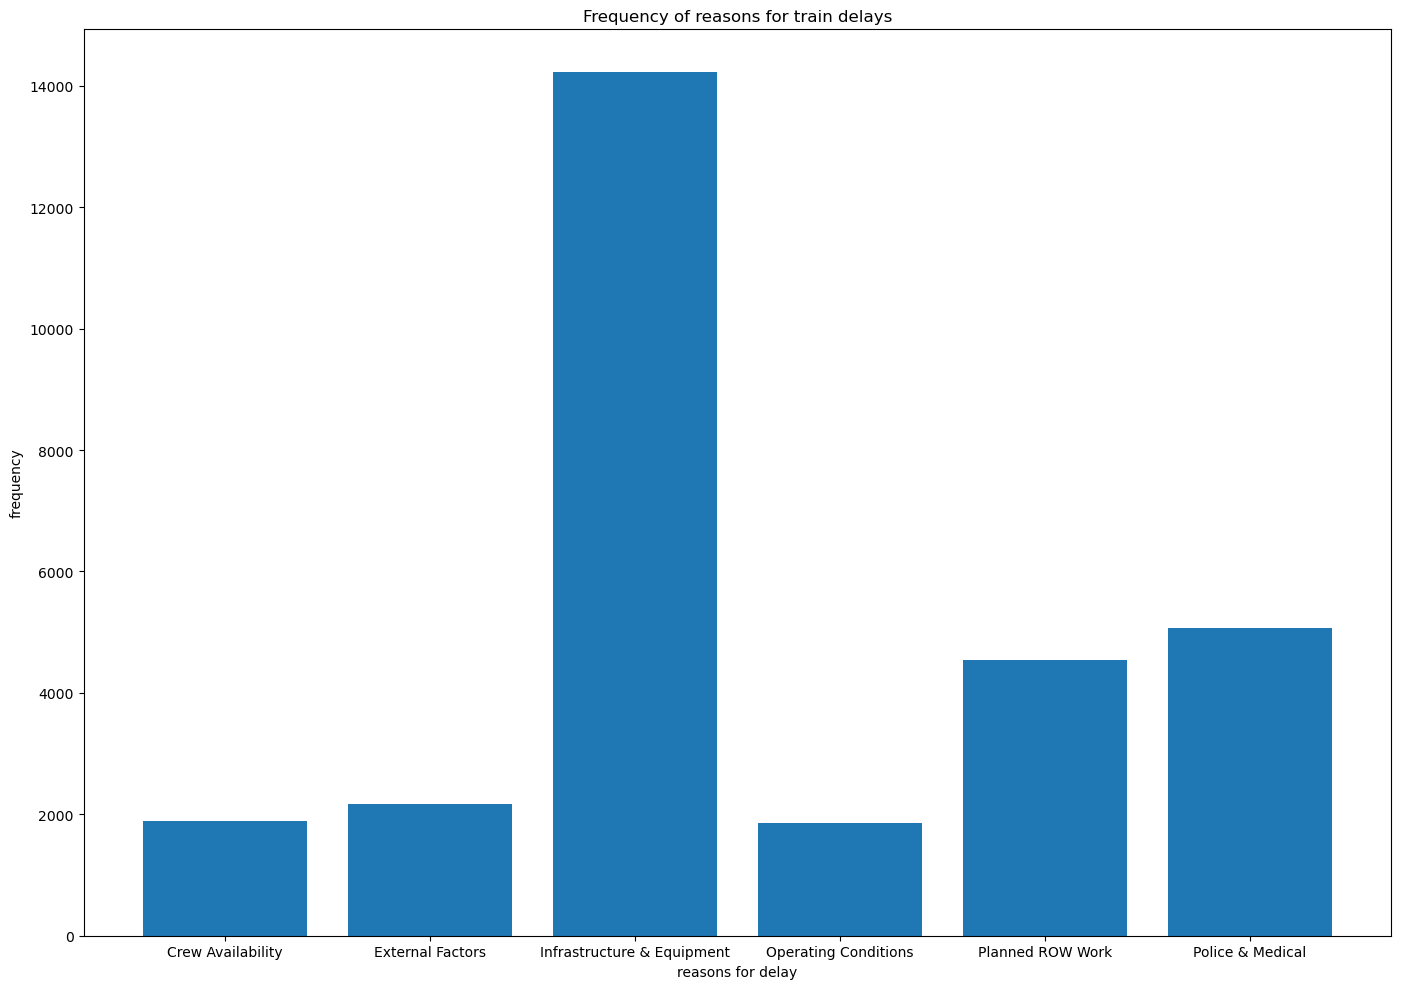

In [99]:
import matplotlib.pyplot as plt
reasons = list(reasonfrequency.keys())
counts = list(reasonfrequency.values())
plt.figure(figsize=(14,10))#space names out
plt.xlabel("reasons for delay")
plt.ylabel('frequency')
plt.title('Frequency of reasons for train delays')
plt.tight_layout()
plt.bar(reasons,counts)


<BarContainer object of 24 artists>

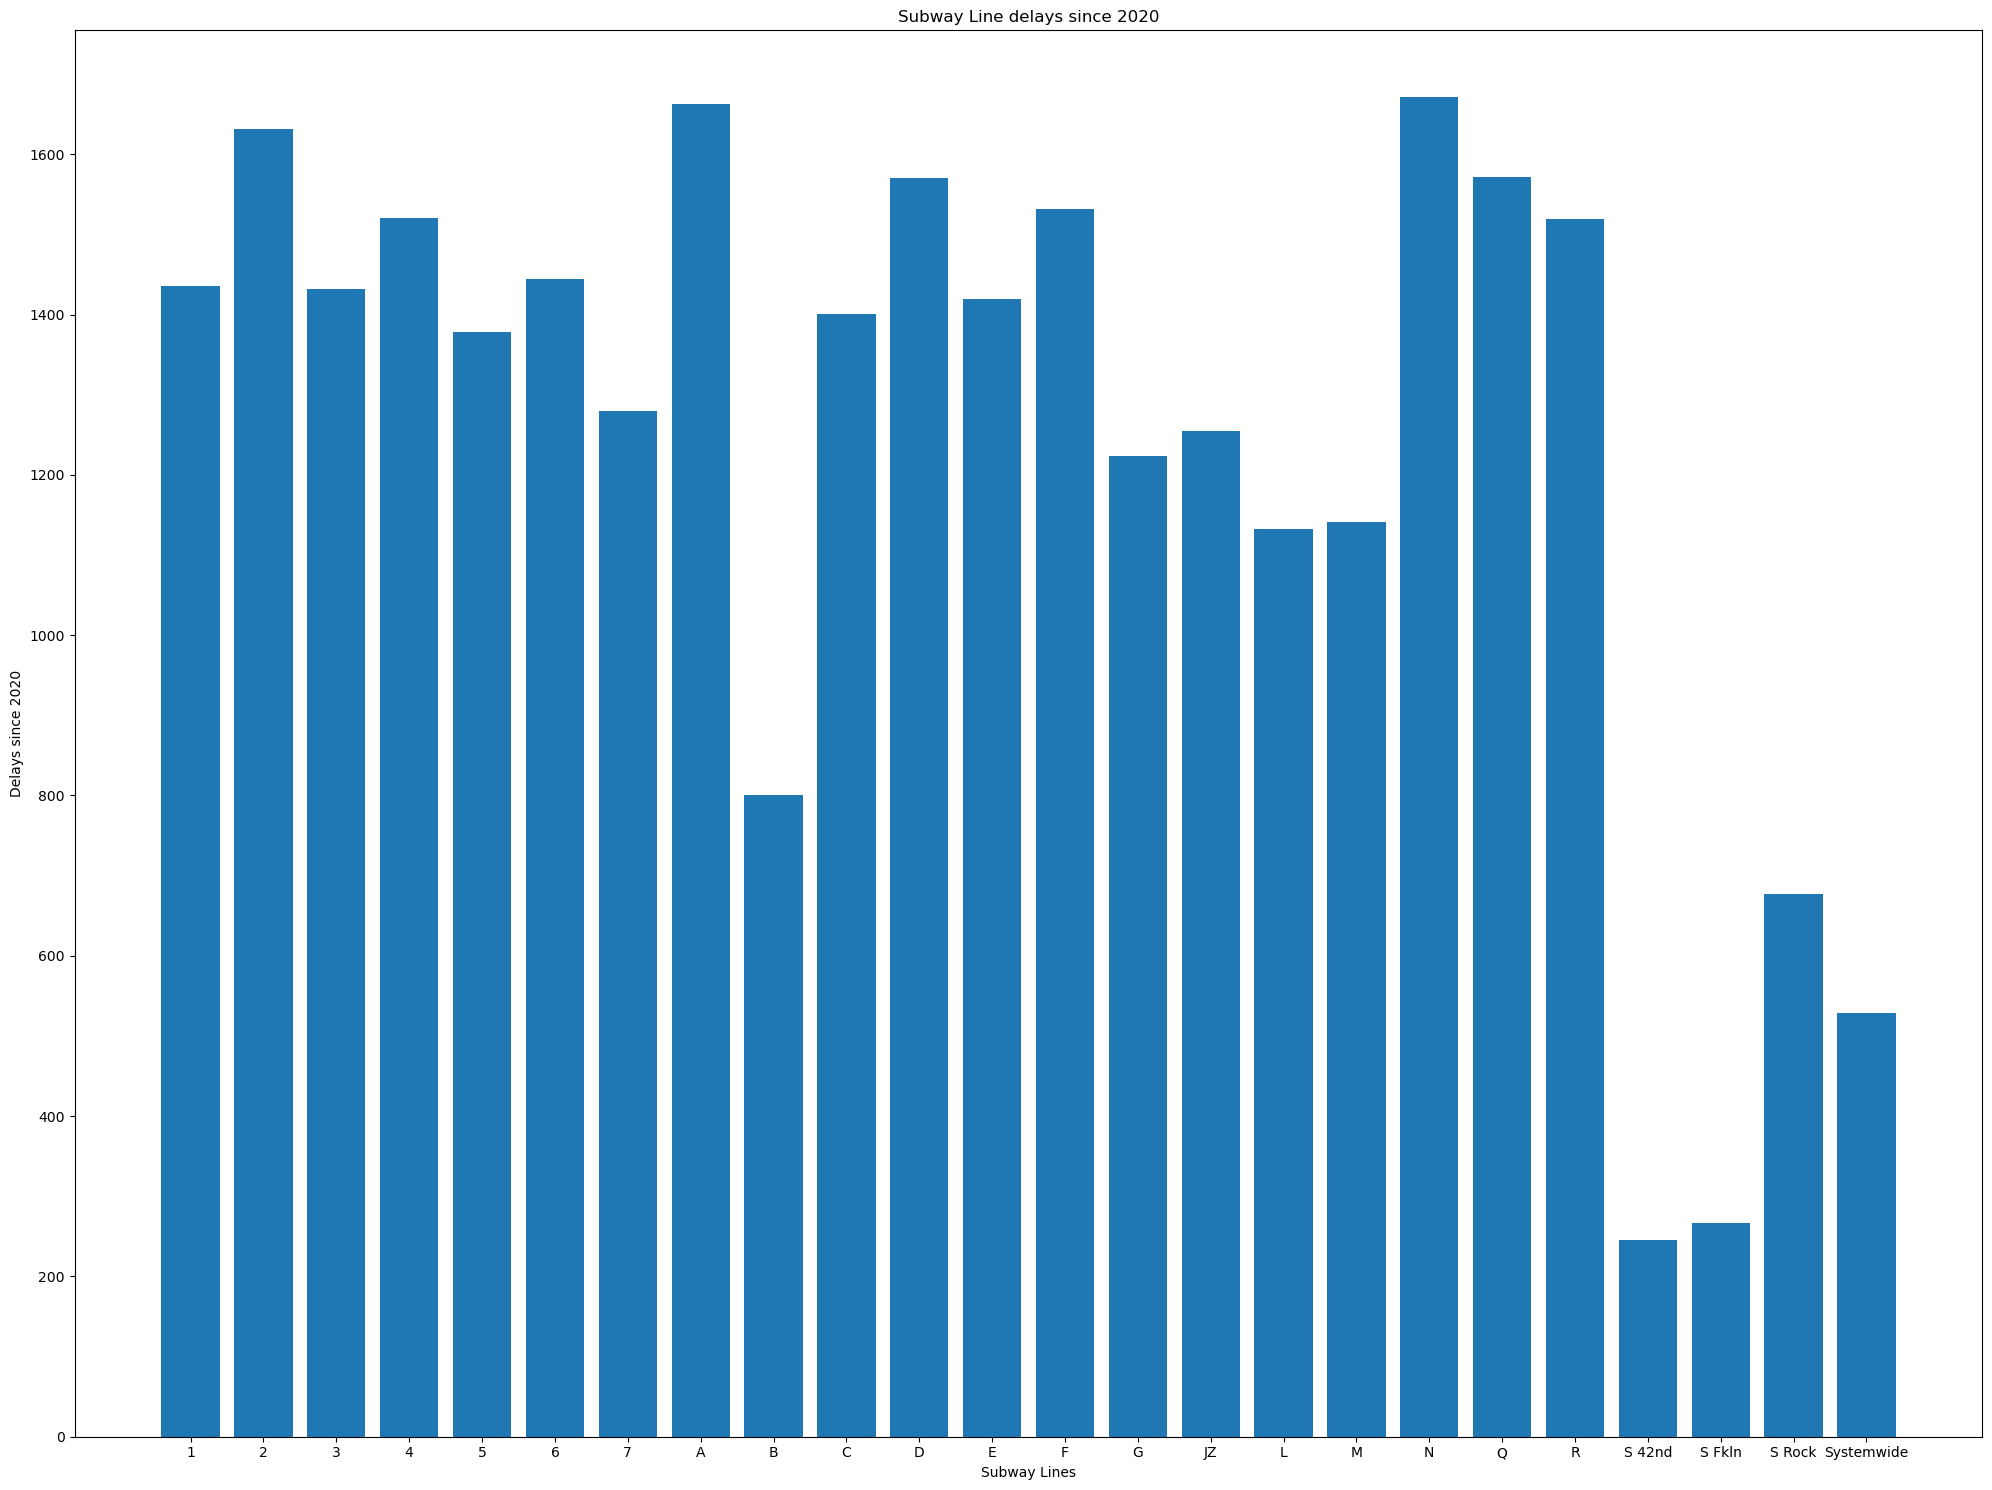

In [100]:
lines = list(frequency.keys())
delays = list(frequency.values())
plt.figure(figsize = (20,15))#to space the names out
plt.xlabel('Subway Lines')
plt.ylabel('Delays since 2020')
plt.title('Subway Line delays since 2020')
plt.tight_layout()
plt.bar(lines,delays)


Evidently, the most common reason for delays on the subway since 2020 are infrastructure and equipment issues. This category accounts for over double the delays versus the second most common reason, police and medical activity. It is a problem that in the biggest city in the country, infrastructure and equipment have caused almost 14 thousand delays in the last three years. As for my second question, the most frequently delayed line on the subway system is the N train with the A train being a close second. Aside from the shuttle trains, the B train is the line which experiences the least delays which makes sense since it does not run 24/7 like the rest of the trains. The train I use to commute, the D train, is the 4th most frequently delayed train 🙁

## Part 7 - Heights and Weights


[[1.         0.76046219]
 [0.76046219 1.        ]]


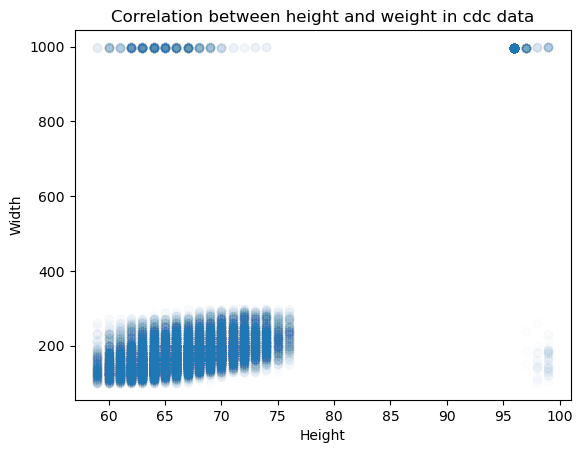

In [101]:
with open('../data/raw/adult19.csv')as f:
    next(f)
    reader = csv.reader(f)
    height = []
    weight = []
    for row in reader:
        height.append(int(row[50]))
        weight.append(int(row[49]))
    #extract data into arrays
    corrCoefficient = np.corrcoef(height,weight)
    print(corrCoefficient)
    plt.scatter(height,weight,alpha = 0.01)
    plt.xlabel('Height')
    plt.ylabel('Width')
    plt.title("Correlation between height and weight in cdc data")


